# 预测模型

## 预测模型介绍

**预测**(Prediction)是根据事物的历史资料及现状，运用一定的理论和方法，探求事物演变规律，对其未来发展状况作出的一种科学推测。生活中使用预测模型的场景比如：
- 天气预报
- 飞机晚点预测
- 房价预测
- 股市


随着科学技术的发展和各种预测实践经验的积累，预测作为一门综合性科学已发展成为一门比较完善的学科，现在预测方法已近二百种（最常用的有十几种），但每种方法都有一定的使用范围，它们往往是相互补充的，实际预测时也常常是几种方法一起用。

预测方法虽然很多，但到目前为止，还没有一个统一的、普遍适用的分类体系，若根据预测的性质，大体可将预测分为**定性预测**和**定量预测**两类。

```{figure} https://cdn.kesci.com/upload/image/q32dm25jw8.png?imageView2/0
---
height: 450px
name: 预测模型框架图
---

```


定量预测的特点是偏重于利用统计资料，借助于数学方法建立数学模型进行预测，是以数学模型为主的预测方法。又可分为**因果预测**和**时间序列预测**。
- **因果预测**是以相关原理来分析预测对象与有关因素的相互关系，并以此关系构造模型进行预测。例如，要预测人的血压与年龄的关系、贫血与缺铁的关系等都可以用此预测方法。常用的因果预测模型有**回归分析、数量经济模型、灰色系统模型、生命周期分析**等。
- **时间序列预测**是根据预测对象时间序列的变化特征，来研究事物自身的发展规律和探讨未来发展趋势的。时间序列与因果预测的最重要区别就在于其研究的是“自身”的变化规律而不是因素之间的关系。

## 线性回归

**确定性关系和相关关系：**

- **参数之间的确定性关系是指某参数可以完全由其他参数所决定**，例如正方形的面积与边长的关系，总价格与单价和数量的关系等。
- **相关关系是指一个或多个变量之间有一定的联系，但是这个联系不是完全决定性的**。例如，人的身高与体重有一定的关系，一般来讲身高高的人体重相对大一些。但是它们之间不能用一个确定的表达式表示出来。这次变量之间的关系。我们称之为相关关系。又如环境因素与农作物的产量也有相关关系，因为在相同环境条件下农作物的产量也有区别，这也就是说农作物的产量是一个随机变量。


**回归分析：**回归分析就是研究相关关系的一种数学方法，是寻找不完全确定的变量间的数学关系式并进行统计推断的一种方法。它能帮助我们从一个变量取得的值去估计另一个变量的值。

**线性回归：**回归分析中最简单的是线性回归。


### 一元线性回归模型

单变量线性回归，又称简单线性回归（simple linear regression,SLR），是最简单但用途很广的回归模型。其回归式为：

$$
y=\alpha+\beta x
$$

为了从一组样本$\{\left(x_{i}, y_{i}\right)|i = 1,2,\cdots,n\}$之中估计最合适的参数$\alpha$和$\beta$，通常采用**最小二乘法**，其计算目标为**最小化残差平方和**：

$$
\min \sum_{i=1}^{n} \varepsilon_{i}^{2}=\min \sum_{i=1}^{n}\left(y_{i}-\alpha-\beta x_{i}\right)^{2}
$$

**本课程我们暂不关心最小二乘法的推导过程，只需了解其原理及应用即可。** 这里直接给出最小二乘估计的结果

$$
\begin{aligned}
\hat{\alpha}&=\bar{y}-\bar{x} \hat{\beta}\\
\hat{\beta}&=S_{x y} / S_{x x}
\end{aligned}
$$

其中，

$$
\bar{y}=\frac{1}{n} \sum_{i} y_{i}
$$

$$
\bar{x}=\frac{1}{n} \sum_{i} x_{i}
$$

$$
S_{x x}=\sum_{i}\left(x_{i}-\bar{x}\right)^{2}
$$

$$
S_{y y}=\sum_{i}\left(y_{i}-\bar{y}\right)^{2}
$$

$$
S_{x y}=\sum_{i}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)
$$

现在有一组高中生的身高和腿长的数据，用一元线性回归研究他们之间的关系，然后对新的同学进行预测。先来看看数据的**散点图**

Text(0, 0.5, '$L$')

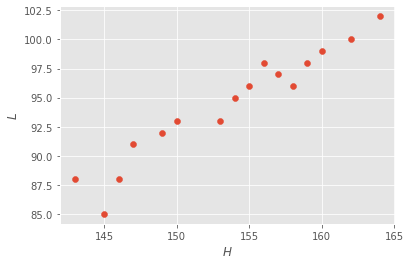

In [1]:
import numpy as np    # 导入 numpy库，用于科学计算
import pandas as pd    # 导入 pandas库 ，用于数据分析
import matplotlib.pyplot as plt   # 导入 pandas库 ，用于数据可视化

%matplotlib inline 
plt.style.use("ggplot")  # 使用ggplot绘图风格
from sklearn.linear_model import LinearRegression  # 导入线性回归工具函数 LinearRegression
x = np.array([143, 145, 146, 147, 149, 150, 153, 154, 155,
              156, 157, 158, 159, 160, 162, 164])  # 输入x数据
x = x.reshape(16, 1)    # 修改数据的格式，从行向量转换为列向量
y = np.array([88, 85, 88, 91, 92, 93, 93, 95, 96,
              98, 97, 96, 98, 99, 100, 102])  # 输入y数据
plt.scatter(x, y)    # 绘制散点图
plt.xlabel(r'$H$')  # 添加xlabel
plt.ylabel(r'$L$')  # 绘制ylabel

很明显，升身高和体重明显**符合线性关系**。下面我们使用`sklearn.linear_model`中的`LinearRegression`方法进行线性回归

In [2]:
# 1. 初始化线性回归函数，命名为lrModel
lrModel = LinearRegression()
# 2. 使用lrModel对数据x,y进行拟合
lrModel.fit(x,y)

LinearRegression()

In [3]:
# 3. 输出截距和斜率
print(lrModel.intercept_)
print(lrModel.coef_)

-16.07298072980727
[0.71935219]


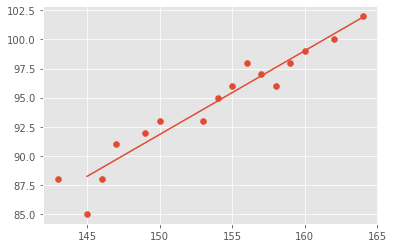

In [4]:
# 4. 根据回归得到的系数，在散点图上绘制回归直线
LR_data = [lrModel.intercept_ + lrModel.coef_ * i for i in range(145,165)]  # 求解回归直线上的一系列点
plt.plot(range(145, 165), LR_data)  # 绘制回归直线
plt.scatter(x, y)   # 绘制散点图

我们常常用相关系数$R^2$描述线性拟合的效果，使用方法如下

In [5]:
# 5. 计算R2
lrModel.score(x,y)

0.928187845952738

执行代码可以看到，模型的评分为`0.928`,是非常不错的一个评分，我们就可以使用这个模型进行未知数据的预测了。（评分等于相关系数$R^2$用于表示拟合得到的模型能解释因变量变化的百分比，$R^2$越接近于1，表示回归模型拟合效果越好，通常认为$R^2 > 0.8$ 就是比较满意的回归结果了）

假定两位新同学的身高分别是170cm和163cm，下面使用本文的模型预测他们的身高。

In [6]:
# 6. 对新的数据进行预测
lrModel.predict([[170],[163]])

array([106.21689217, 101.18142681])

### 多元线性回归模型

在回归分析中，如果有两个或两个以上的自变量，就称为多元回归。事实上，一种现象常常是与多个因素相联系的，由多个自变量的最优组合共同来预测或估计因变量，比只用一个自变量进行预测或估计更有效，更符合实际。

在实际经济问题中，一个变量往往受到多个变量的影响。例如，家庭消费支出，除了受家庭可支配收入的影响外，还受诸如家庭所有的财富、物价水平、金融机构存款利息等多种因素的影响，表现在线性回归模型中的解释变量有多个。这样的模型被称为**多元线性回归模型（multivariable linear regression model）**

$$
y=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\cdots \beta_{m} x_{m}
$$

多元性回归模型的参数估计，同一元线性回归方程一样，也是在要求误差平方和最小的前提下，用最小二乘法求解参数。

$$
\min \sum_{i=1}^{n} \varepsilon_{i}^{2}=\min \sum_{i=1}^{n}\left(y_{i}-\left(\beta_{0}+\beta_{1} x_{1i}+\beta_{2} x_{2i}+\cdots \beta_{m} x_{mi}\right)\right)^{2}
$$

同样地，这里我们暂时不关心回归系数的具体的推导过程，只需要知道如何用Python操作即可。我们通过一个SO2浓度预测的案例进行介绍。

In [7]:
import pandas as pd # 导入 pandas库 ，用于数据分析
data = pd.read_csv('../_static/lecture_specific/prediction_model/so2.csv') # 读入数据
print(data) # 显示数据

    SO2(ppm)    R    G    B    S    H
0          0  153  148  157  138   14
1          0  153  147  157  138   16
2          0  153  146  158  137   20
3          0  153  146  158  137   20
4          0  154  145  157  141   19
5         20  144  115  170  135   82
6         20  144  115  169  136   81
7         20  145  115  172  135   83
8         30  145  114  174  135   87
9         30  145  114  176  135   89
10        30  145  114  175  135   89
11        30  146  114  175  135   88
12        50  142   99  175  137  110
13        50  141   99  174  137  109
14        50  142   99  176  136  110
15        80  141   96  181  135  119
16        80  141   96  182  135  119
17        80  140   96  182  135  120
18       100  139   96  175  136  115
19       100  139   96  174  136  114
20       100  139   96  176  136  116
21       150  139   86  178  136  131
22       150  139   87  177  137  129
23       150  138   86  177  137  130
24       150  139   86  178  137  131


可以看到，这是一个**五个变量**的多元线性回归，我们先通过散点图来看一下**各个变量单独与因变量的关系**。

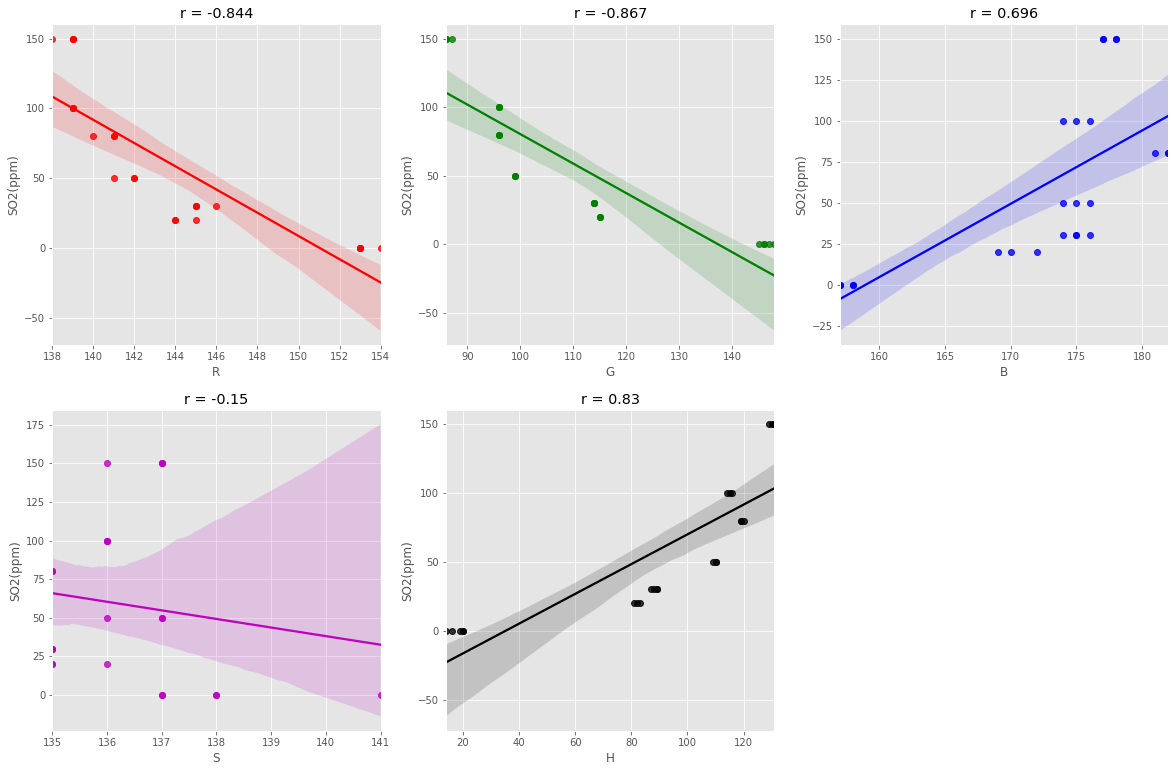

In [8]:
import seaborn as sns  # 导入 seaborn库 ，用于数据可视化
colors = ['r', 'g', 'b', 'm', 'black']  # 指定每个绘图的颜色
xlist = ['R', 'G', 'B', 'S', 'H']  # 指定每个绘图的变量名
plt.figure(figsize=(20, 13))  # 指定图片大小
for i in range(5):
    plt.subplot(2, 3, i+1)  # 绘制子图
    title = 'r = ' + str(round(np.corrcoef(data[xlist[i]],data['SO2(ppm)'])[1][0], 3))  # 定义子图标题
    sns.regplot(x=xlist[i], y="SO2(ppm)", data=data, color=colors[i])  # 绘制带有回归线和置信区间的线性回归图
    plt.title(title)  # 添加子图标题

可以看到，除了第四个变量$S$以外，每一个变量基本上都和因变量有线性关系，因此我们可以删去$S$，进行多元线性回归。

In [9]:
from sklearn.linear_model import LinearRegression  # 导入线性回归函数LinearRegression
lrModel = LinearRegression()     # 初始化回归模型
lrModel.fit(np.array(data[['R', 'G', 'B', 'H']]),
            data['SO2(ppm)'])  # 输入需要回归的数据
print('截距为：', lrModel.intercept_)  # 输出截距
print('系数为：', lrModel.coef_)    # 输出系数
score = lrModel.score(np.array(data[['R', 'G', 'B', 'H']]), data['SO2(ppm)'])
print('R2为：', score)    # 输出相关系数R2

截距为： 2044.021593204974
系数为： [ -1.38977229 -17.5022507    5.68341432  -9.34216398]
R2为： 0.8961318172850157


## 非线性拟合
### 一元非线性多项式拟合
尽管上述的线性模型已经能够求解许多实际问题，然而生活中的很多系统的增长趋势往往是非线性的，这时候我们就需要用到非线性拟合。


对于非线性回归问题而言，最简单也是最常见的方法就是**多项式回归**。多项式（Polynomial）是代数学中的基础概念，是由称为未知数的变量和称为系数的常量通过有限次加法、加减法、乘法以及自然数幂次的乘方运算得到的代数表达式。多项式是整式的一种。未知数只有一个的多项式称为一元多项式；例如$x^{2}-3 x+4$就是一个一元多项式。未知数不止一个的多项式称为多元多项式，例如$x^{3}-2 x y z^{2}+2 y z+1$就是一个三元多项式。

首先，我们通过一组示例数据来认识多项式回归，示例数据一共有 10 组，分别对应着横坐标和纵坐标。接下来，通过 Matplotlib 绘制数据，查看其变化趋势。

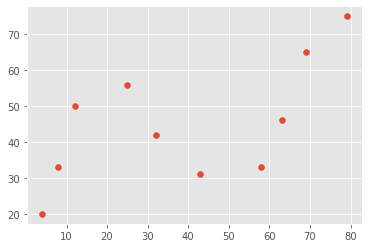

In [10]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79] # 输入x
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]  # 输入y 
plt.scatter(x, y)  # 绘制散点图

接下来，通过多项式来拟合上面的散点数据。一个标准的一元高阶多项式函数如下所示：

$$
y(x, w)=w_{0}+w_{1} x+w_{2} x^{2}+\ldots+w_{m} x^{m}=\sum_{j=0}^{m} w_{j} x^{j}
$$

其中，$m$表示多项式的阶数，$x^j$表示$x$的$j$次幂，$w$则代表该多项式的系数。当我们使用上面的多项式去拟合散点时，需要确定两个要素，分别是：
- 多项式系数$w$
- 多项式阶数$m$

这也是多项式的两个基本要素。

如果通过手动指定多项式阶数$m$的大小，那么就只需要确定多项式系数$w$的值是多少。例如，这里首先指定$m=2$,多项式就变成了：
$$
y(x, w)=w_{0}+w_{1} x+w_{2} x^{2}=\sum_{j=0}^{2} w_{j} x^{j}
$$

当我们确定$w$的值的大小时，就回到了前面线性回归中学习到的内容，具体来说，就是最小化残差平方和（最小二乘法）。

我们先尝试使用二次多项式拟合。

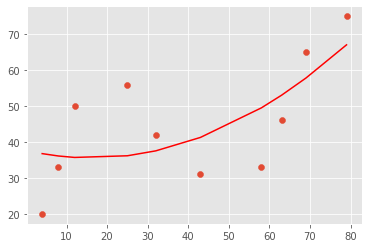

In [11]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]
from scipy.optimize import curve_fit  # 导入非线性拟合函数curve_fit

# 定义需要拟合的函数形式，这里使用二次函数的一般式 y = ax^2 + bx + c
def f2(x, a, b, c):
    return a * x**2 + b*x + c


plt.scatter(x, y)  # 绘制散点图
popt, pcov = curve_fit(f2, x, y)    # 执行非线性拟合
# popt数组中，三个值分别是待求参数a,b,c
y1 = [f2(i, popt[0], popt[1], popt[2]) for i in x]   # 计算得到拟合曲线上的一系列点
plt.plot(x, y1, 'r')   # 绘制拟合曲线

可以看到，其效果并不好，增大次数试一下？

Text(0.5, 1.0, '38.052046270695655')

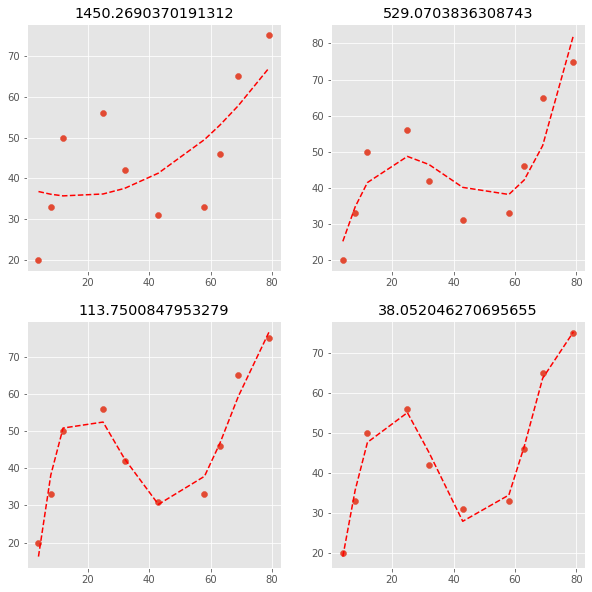

In [12]:
# f3为三次多项式
def f3(x, a, b, c,d):  
    return a * x**3 + b*x**2 +c *x +d
# f4为四次多项式
def f4(x, a, b, c,d,e):  
    return a * x**4 + b*x**3 +c *x**2 +d*x + e
# f5为五次多项式
def f5(x, a, b, c,d,e,f):  
    return a * x**5 + b*x**4 +c *x**3 +d*x**2 + e*x +f

# 定义方差计算函数
def error(y1,y2):
    a = np.array(y1)
    b = np.array(y2)
    return np.dot(a-b,a-b)
    

plt.figure(figsize = (10,10)) # 定义图片大小
plt.subplot(2,2,1) # 开始绘制第1张子图
plt.scatter(x, y)  # 绘制（x,y）的散点图
popt, pcov = curve_fit(f2, x, y)    # 执行2次多项式拟合
#popt数组中，三个值分别是待求参数a,b,c  
y1 = [f2(i, popt[0],popt[1],popt[2]) for i in x]  # 得到拟合曲线上的一系列点
plt.plot(x,y1,'r--')   # 绘制拟合曲线
plt.title(str(error(y,y1))) # 计算方差，并作为图片的标题

plt.subplot(2,2,2) # 开始绘制第2张子图
plt.scatter(x, y) # 绘制（x,y）的散点图
popt, pcov = curve_fit(f3, x, y)   # 执行3次多项式拟合
#popt数组中，三个值分别是待求参数a,b,c,d  
y1 = [f3(i, popt[0],popt[1],popt[2],popt[3]) for i in x]    # 得到拟合曲线上的一系列点
plt.plot(x,y1,'r--')   # 绘制拟合曲线
plt.title(str(error(y,y1))) # 计算方差，并作为图片的标题


plt.subplot(2,2,3) # 开始绘制第3张子图
plt.scatter(x, y)
popt, pcov = curve_fit(f4, x, y)  
y1 = [f4(i, popt[0],popt[1],popt[2],popt[3],popt[4]) for i in x]  
plt.plot(x,y1,'r--')  
plt.title(str(error(y,y1)))

plt.subplot(2,2,4) # 开始绘制第4张子图
plt.scatter(x, y)
popt, pcov = curve_fit(f5, x, y)  
y1 = [f5(i, popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]) for i in x]  
plt.plot(x,y1,'r--')  
plt.title(str(error(y,y1)))

**思考：**一定是越高的阶次越好吗？


![Image Name](https://cdn.kesci.com/upload/image/q33loqharh.png?imageView2/0/w/960/h/960)

注意：兼顾拟合误差和预测误差。防止**过拟合（overfit）**和**欠拟合（underfit）**。

### 一元其他非线性函数拟合

这里我们举一个指数拟合的例子与二次函数拟合进行对比。实际上，使用本课程讲到的方法，可以进行任意形式的函数拟合。

$$
f_1(x) = x^a + b
$$

$$
f_2(x) = ax^2 + b
$$

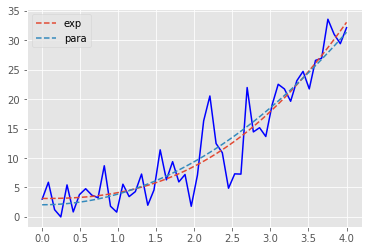

In [13]:
# 定义f1
def f1(x, a, b):  
    return x**a + b  
# 定义f2
def f2(x,a,b):
    return a*x**2 + b
# 随机生成数据并绘制折线图
xdata = np.linspace(0, 4, 50)  
y = f1(xdata, 2.5, 1.3)  
ydata = y + 4 * np.random.normal(size=len(xdata))  
plt.plot(xdata,ydata,'b-') 

# 开始拟合
popt1, pcov1 = curve_fit(f1, xdata, ydata)   # 使用f1进行拟合
popt2, pcov2 = curve_fit(f2, xdata, ydata)    # 使用f2进行拟合

y1 = [f1(i, popt1[0],popt1[1]) for i in xdata]
y2 = [f2(i, popt2[0],popt2[1]) for i in xdata]
plt.plot(xdata,y1,'--',label = 'exp')  
plt.plot(xdata,y2,'--',label = 'para') 
plt.legend()

## 时间序列方法

### 移动平均法

移动平均法是根据时间序列资料逐渐推移，依次计算包含一定项数的时序平均数，以反映长期趋势的方法。当时间序列的数值由于受周期变动和不规则变动的影响，起伏较大，不易显示出发展趋势时，可用移动平均法，消除这些因素的影响，分析、预测序列的长期趋势。移动平均法有**简单移动平均法，加权移动平均法，趋势移动平均法**等。

#### 简单移动平均法

当预测目标的基本趋势是在某一水平上下波动时，可用一次简单移动平均方法建立预测模型。设观测序列为$y_{1}, \cdots, y_{T}$,取移动平均的项数 $N < T$,

$$
\hat{y}_{t+1}=\frac{1}{N}\left(\hat{y}_{t}+\cdots+\hat{y}_{t-N+1}\right), t=N, N+1, \cdots,
$$

即：最近$N$期序列值的平均值作为未来各期的预测结果。

一般$N$取值范围：$5 \leq N \leq 200$。当历史序列的基本趋势变化不大且序列中随机变动成分较多时，$N$ 的取值应较大一些。否则$N$的取值应小一些。在有确定的季节变动周期的资料中，移动平均的项数应取周期长度。选择最佳$N$值的一个有效方法是，比较若干模型的预测误差。预测标准误差最小者为好。

**例：**某企业1-11月份的销售收入时间序列如下表所示。试用一次简单移动平均预测其12月份的销售收入。

| 月份     	| 1     	| 2     	| 3     	| 4      	| 5      	| 6     	|
|----------	|-------	|-------	|-------	|--------	|--------	|-------	|
| 销售收入 	| 533.8 	| 574.6 	| 606.9 	| 649.8  	| 705.1  	| 772.0 	|
| 月份     	| 7     	| 8     	| 9     	| 10     	| 11     	|       	|
| 销售收入 	| 816.4 	| 892.7 	| 963.9 	| 1015.1 	| 1102.7 	|       	|

**解：** 分别取$N=4,N=5$的预测公式

$$
\begin{aligned}
&\hat{y}_{t+1}^{(1)}=\frac{y_{t}+y_{t-1}+y_{t-2}+y_{t-3}}{4}, \quad t=4,5, \cdots, 11\\
&\hat{y}_{t+1}^{(1)}=\frac{y_{t}+y_{t-1}+y_{t-2}+y_{t-3}+y_{t-4}}{5}, \quad t=5, \cdots, 11
\end{aligned}
$$

当$N=4$时，预测值$\hat{y}_{12}^{(1)}=993.6$预测的标准误差为
$$
S_{1}=\sqrt{\frac{\sum_{i=5}^{11}\left(\hat{y}_{t}^{(1)}-y_{t}\right)^{2}}{11-4}}=150.5
$$

当$N=5$时，预测值$\hat{y}_{12}^{(1)}=958.2$预测的标准误差为
$$
S_{2}=\sqrt{\frac{\sum_{t=6}^{11}\left(\hat{y}_{t}^{(1)}-y_{t}\right)^{2}}{11-5}}=182.4
$$

计算结果表明，$N = 4$时，预测的标准误差较小，所以选取$N = 4$。预测第 12 月份的销售收入为993.6。

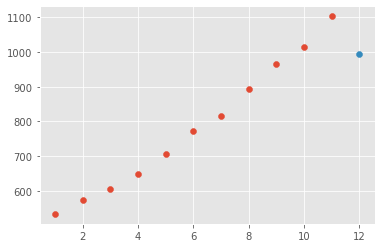

In [14]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # 输入x值
y = [
    533.8,
    574.6,
    606.9,
    649.8,
    705.1,
    772.0,
    816.4,
    892.7,
    963.9,
    1015.1,
    1102.7]  # 输入y值
plt.scatter(x, y)  # 绘制散点图
N = 4  # 选择N=4
y12 = np.mean(y[-4:])  # 进行移动平均预测
plt.scatter(12, y12)  # 绘制移动平均结果

简单移动平均法**只适合做近期预测**，而且是预测目标的**发展趋势变化不大**的情况。如果目标的发展趋势存在其它的变化，采用简单移动平均法就会产生较大的预测偏差和滞后。

#### 加权移动平均法

在简单移动平均公式中，每期数据在求平均时的作用是等同的。但是，每期数据所包含的信息量不一样，近期数据包含着更多关于未来情况的信心。因此，把各期数据等同看待是不尽合理的，应考虑各期数据的重要性，对近期数据给予较大的权重，这就是加权移动平均法的基本思想。


设观测序列为$y_{1}, \cdots, y_{T}$,加权移动平均值计算公式为：
$$
\hat{y}_{t+1}=\frac{w_{1} y_{t}+w_{2} y_{t-1}+\cdots+w_{N} y_{t-N+1}}{w_{1}+w_{2}+\cdots+w_{N}}, t \geq N
$$


式中，$\hat{y}_{t+1}$为$t+1$期的预测值；$w_i$为$y_{t-i+1}$的权数，它体现了相应的$y_t$在加权平均数中的重要性。

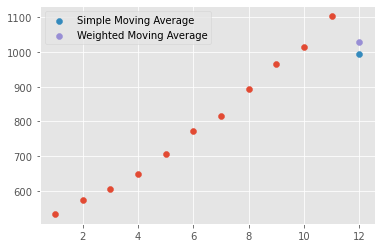

In [15]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # 输入x值
y = [
    533.8,
    574.6,
    606.9,
    649.8,
    705.1,
    772.0,
    816.4,
    892.7,
    963.9,
    1015.1,
    1102.7]  # 输入y值
plt.scatter(x, y)  # 绘制散点图
N = 4  # 选择移动平均项数
w = [0.1, 0.2, 0.3, 0.4]  # 指定权重
y12 = np.mean(y[-4:])  # 简单移动平均预测12月份收入
y12_weighted = np.dot(y[-4:], w)  # 加权移动平均预测12月份收入
plt.scatter(12, y12, label='Simple Moving Average')  # 绘制简单移动平均结果
plt.scatter(12, y12_weighted, label='Weighted Moving Average')  # 绘制加权移动平均结果
plt.legend()  # 加入图例

在加权移动平均法中， $w_t$的选择，同样具有一定的经验性。一般的原则是：近期数据的权数大，远期数据的权数小。至于大到什么程度和小到什么程度，则需要按照预测者对序列的了解和分析来确定。

#### 趋势移动平均法

下面讨论如何利用移动平均的滞后偏差建立直线趋势预测模型。设时间序列$\left\{y_{t}\right\}$从某时期开始具有直线趋势，且认为未来时期也按此直线趋势变化，则可设此直线趋势预测模型为
$$
\hat{y}_{t+T}=a_{t}+b_{t} T, \quad T=1,2, \cdots 
\tag{1}
$$


其中 $t$ 为当前时期数；$T$ 为由$t$至预测期的时期数； $a_t$ 为截距； $b_t$ 为斜率。两者又称为平滑系数。


现在，我们根据移动平均值来确定平滑系数。由模型(1)可知
$$
\begin{aligned}
&a_{t}=y_{t}\\
&y_{t-1}=y_{t}-b_{t}\\
&y_{t-2}=y_{t}-2 b_{t}\\
&y_{t-N+1}=y_{t}-(N-1) b_{t}
\end{aligned}
$$

所以
$$
\begin{aligned}
M_{t}^{(1)} &=\frac{y_{t}+y_{t-1}+\cdots+y_{t-N+1}}{N}=\frac{y_{t}+\left(y_{t}-b_{t}\right)+\cdots+\left[y_{t}-(N-1) b_{t}\right]}{N} \\
&=\frac{N y_{t}-[1+2+\cdots+(N-1)] b_{t}}{N}=y_{t}-\frac{N-1}{2} b_{t}
\end{aligned}
$$

因此
$$
y_{t}-M_{t}^{(1)}=\frac{N-1}{2} b_{t}
\tag{2}
$$

类似以上的推导，我们还可以得到
$$
y_{t-1}-M_{t-1}^{(1)}=\frac{N-1}{2} b_{t}
$$

所以

$$
y_{t}-y_{t-1}=M_{t}^{(1)}-M_{t-1}^{(1)}=b_{t}
$$

类似式（2）的推导，可得

$$
M_{t}^{(1)}-M_{t}^{(2)}=\frac{N-1}{2} b_{t}
\tag{3}
$$

于是，由式（2）和式（3）可得平滑系数的计算公式为
$$
\left\{\begin{array}{l}
{a_{t}=2 M_{t}^{(1)}-M_{t}^{(2)}} \\
{b_{t}=\dfrac{2}{N-1}\left(M_{t}^{(1)}-M_{t}^{(2)}\right)}
\end{array}\right.
$$

继续沿用上面的例子，进行趋势移动平均的计算

In [16]:
# 趋势移动平均代码
def moveingAverage(data,N):
    temp = data.copy()
    for i in range(len(temp)):
        if i >=  N :
            temp[i] = np.mean(data[i-N:i])
        else:
            temp[i] = 0
    return temp

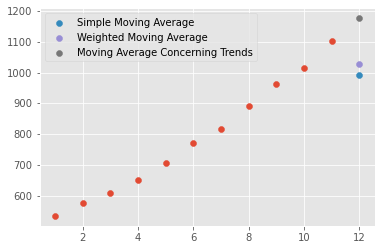

In [17]:
x = [1,2,3,4,5,6,7,8,9,10,11]
y =  [533.8,574.6,606.9,649.8,705.1,772.0 ,816.4, 892.7,963.9,1015.1,1102.7]
plt.scatter(x,y)
N = 4
w = [0.1,0.2,0.3,0.4]
y12 = np.mean(y[-4:])
y12_weighted = np.dot(y[-4:],w)

# 趋势移动平均代码
N = 4
MA1 = moveingAverage(y,N)
MA2 = moveingAverage(MA1,N)
at = 2 * MA1[-1] - MA2[-1]
bt = 2/(N-1) * (MA1[-1] - MA2[-1])

y_hat = at + bt * 1

plt.scatter(12,y12,label = 'Simple Moving Average')
plt.scatter(12,y12_weighted,label = 'Weighted Moving Average')
plt.scatter(12,y_hat,label = 'Moving Average Concerning Trends')
plt.legend()

趋势移动平均法对于同时存在直线趋势与周期波动的序列，是一种既能反映趋势变化，又可以有效地分离出来周期变动的方法。

#### 自适应滤波法

自适应滤波法与移动平均法、指数平滑法一样，也是以时间序列的历史观测值进行某种加权平均来预测的，它要寻找一组“最佳”的权数，其办法是先用一组给定的权数来计算一个预测值，然后计算预测误差，再根据预测误差调整权数以减少误差。这样反复进行，直至找出一组“最佳”权数，使误差减少到最低限度。由于这种调整权数的过程与通讯工程中的传输噪声过滤过程极为接近，故称为自适应滤波法。

自适应滤波法的基本预测公式为
$$
\hat{y}_{t+1}=w_{1} y_{t}+w_{2} y_{t-1}+\cdots+w_{N} y_{t-N+1}=\sum_{i=1}^{N} w_{i} y_{t-i+1}
$$

式中,$\hat{y}_{t+1}$为第$t +1$期的预测值,$w_i$为第$t-i+1$期的观测权数。其调整权数的公式为

$$
w_{i}^{\prime}=w_{i}+2 k \cdot e_{i+1} y_{t-i+1}
$$

式中,$i=1,2, \cdots, N, t=N, N+1, \cdots, n$,n为序列数据的个数,$w_i$ 为调整前的第$i$个权数，$w_{i}^{\prime}$为调整后的第$i$个权数，$k$为学习常数，$e_{i+1}$为第$t +1$期的预测误差。

上式表明：调整后的一组权数应等于旧的一组权数加上误差调整项，这个调整项包括预测误差、原观测值和学习常数等三个因素。学习常数$k$的大小决定权数调整的速度。


下面举一个简单的例子来说明此法的全过程。设有一个时间序列包括10 个观测值，如下表所示。试用自适应滤波法，以两个权数来求第11 期的预测值。

| 时期   	| 1   	| 2   	| 3   	| 4   	| 5   	| 6   	| 7   	| 8   	| 9   	| 10 	|
|--------	|-----	|-----	|-----	|-----	|-----	|-----	|-----	|-----	|-----	|----	|
| 观测值 	| 0.1 	| 0.2 	| 0.3 	| 0.4 	| 0.5 	| 0.6 	| 0.7 	| 0.8 	| 0.9 	| 1  	|

本例中$N = 2$。取初始权数 $w_1 = 0.5$， $w_2 = 0.5$ ，并设$k = 0.9$。$t$的取值由$N = 2$开始，当$t=2$时：

1. 按预测公式,求第$t +1= 3$期的预测值。
$$
\hat{y}_{t+1}=\hat{y}_{3}=w_{1} y_{2}+w_{2} y_{1}=0.15
$$
2. 计算预测误差。
$$
e_{t+1}=e_{3}=y_{3}-\hat{y}_{3}=0.3-0.15=0.15
$$
3. 更新权重
$$
w_{i}^{\prime}=w_{i}+2 k \cdot e_{i+1} y_{t-i+1}
$$
展开就是，
$$
\begin{aligned}
&w_{1}^{\prime}=w_{1}+2 k e_{3} y_{2}=0.554\\
&w_{2}^{\prime}=w_{2}+2 k e_{3} y_{1}=0.527
\end{aligned}
$$

依次类推，我们可以按照同样的规律从4-10继续调整权重，这时，第一轮调整就此结束。

把现有的新权数作为初始权数，重新开始$t = 2$的过程。这样反复进行下去，到预测误差（指新一轮的预测总误差）没有明显改进时，就认为获得了一组“最佳”权数，能实际用来预测第11 期的数值。本例在调整过程中，可使得误差降为零，而权数达到稳定不变，最后得到的“最佳”权数为
$$
w_{1}^{\prime}=2.0, \quad w_{2}^{\prime}=-1.0
$$

用“最佳”权数预测第 11 期的取值

$$
\hat{y}_{11}=w_{1}^{\prime} y_{10}+w_{2}^{\prime} y_{9}=1.1
$$


在实际应用中，权数调整计算工作量可能很大，必须借助于计算机才能实现。

In [18]:
yt=[0.1 * i for i in range(1,11)]
m=len(yt)
k=0.9
N=2
Terr=10000
w=np.ones(N)/N
while abs(Terr)>0.00001:
    Terr=[]
    for j in range(N+1,m):
        yhat = np.dot(w,yt[j-N:j])
        err = yt[j] - yhat
        Terr.append(err)
        w = w + 2*k*err*np.array(yt[j-N:j])
    Terr = max(Terr)

**$N$, $k$值和初始权数的确定**

在开始调整权数时，首先要确定权数个数$N$和学习常数$k$ 。一般说来，当时间序列的观测值呈季节变动时， $N$ 应取季节性长度值。如序列以一年为周期进行季节变动时，若数据是月度的，则取$N = 12$，若季节是季度的，则取$N = 4$。如果时间序列无明显的周期变动，则可用自相关系数法来确定，即取$N$为最高自相关系数的滞后时期。

$k$的取值一般可定为$1/N$ ，也可以用不同的$k$值来进行计算，以确定一个能使$S$最小的$k$值。


初始权数的确定也很重要，如无其它依据，也可用$1/ N$ 作为初始权系数用，即
$$
w_{i}=\frac{1}{N}(i=1,2, \cdots, N)
$$

自适应滤波法有两个明显的优点：
- 一是技术比较简单，可根据预测意图来选择权数的个数和学习常数，以控制预测。也可以由计算机自动选定。
- 二是它使用了全部历史数据来寻求最佳权系数，并随数据轨迹的变化而不断更新权数，从而不断改进预测。由于自适应滤波法的预测模型简单，又可以在计算机上对数据进行处理，所以这种预测方法应用较为广泛。

## 预测方法总结


**回归分析法：** 适合中、小样本预测
**时间序列方法：** 适合中、大样本的随机因素或周期特征的未来趋势未来预测

## 练习

1. 用如下代码生成一个包含了随机变动的正弦函数曲线，请你使用多项式拟合方法，研究用二次，三次，以及更高次函数拟合的情况，给你你认为的最好的拟合方法。

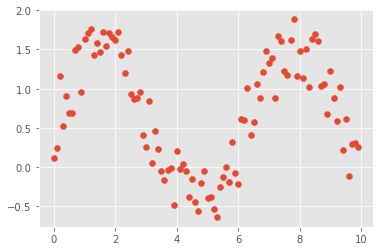

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = [0.1 * i for i in range(100)]
y = [np.sin(t) + np.random.random() for t in x]
plt.scatter(x,y)